In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
a=tf.constant(3)
b=tf.constant(6)

In [ ]:
c=tf.math.add(a,b)

In [ ]:
a

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [ ]:
print(c.numpy())

9


In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [ ]:
bc_data=sklearn.datasets.load_breast_cancer()

In [ ]:
print(bc_data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
data=pd.DataFrame(bc_data.data,columns=bc_data.feature_names)

In [ ]:
data['Label']=bc_data.target

In [ ]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
data.shape

(569, 31)

In [ ]:
data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data['Label'].value_counts()

,count
Label,
1,357
0,212


In [ ]:
x=data.drop(['Label'],axis=1)
y=data['Label']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_xtrain=sc.fit_transform(xtrain)
sc_xtest=sc.fit_transform(xtest)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model=keras.Sequential([
                        keras.layers.Flatten (input_shape=(30,)),
                        keras.layers.Dense(20,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')
                        ])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(sc_xtrain,ytrain,validation_split=0.1,epochs=50)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5298 - loss: 0.7221 - val_accuracy: 0.7826 - val_loss: 0.4967
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7948 - loss: 0.5156 - val_accuracy: 0.9130 - val_loss: 0.3742
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8874 - loss: 0.3897 - val_accuracy: 0.9348 - val_loss: 0.2936
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9069 - loss: 0.3124 - val_accuracy: 0.9565 - val_loss: 0.2369
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9433 - loss: 0.2399 - val_accuracy: 0.9565 - val_loss: 0.1969
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9265 - loss: 0.2361 - val_accuracy: 0.9783 - val_loss: 0.1668
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9461 - loss: 0.1889 - val_accuracy: 0.9783 - val_loss: 0.1447
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9575 - loss: 0.1613 - val_accuracy: 0.9783 - val_loss

In [ ]:
import matplotlib.pyplot as plt

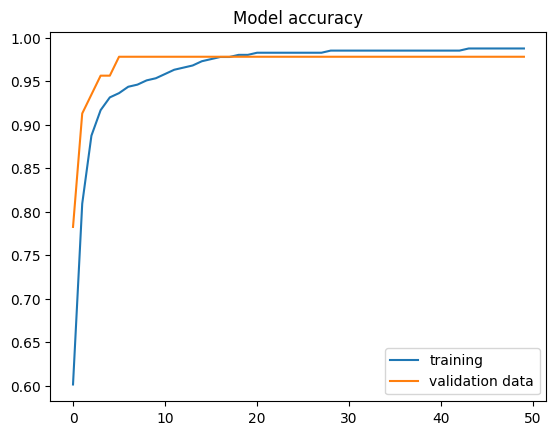

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.legend(['training','validation data'],loc='lower right')

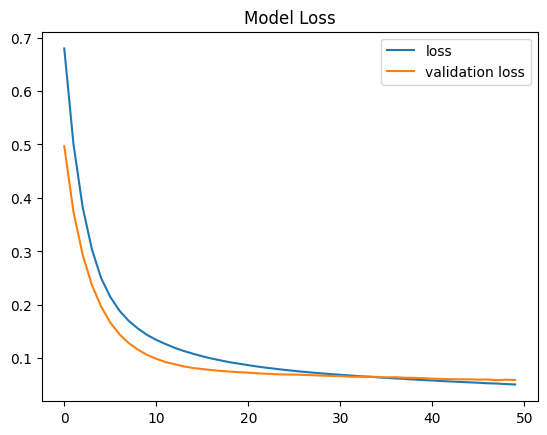

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.legend(['loss','validation loss'],loc='upper right')

In [ ]:
ypred=model.predict(sc_xtest)
print(ypred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[7.43848905e-02 9.90156472e-01]
 [2.40781382e-01 6.47576332e-01]
 [9.89178717e-01 3.94399103e-06]
 [4.99123633e-01 9.89542902e-01]
 [8.72941017e-01 1.07575186e-01]
 [9.93678570e-01 1.49770884e-07]
 [9.74299014e-01 9.15898490e-05]
 [5.43361664e-01 9.93750453e-01]
 [4.24448550e-02 9.89101887e-01]
 [9.99344885e-01 1.74875137e-09]
 [8.22230160e-01 4.45267698e-03]
 [3.70482989e-02 9.97552991e-01]
 [1.66277960e-01 9.31904793e-01]
 [9.57559407e-01 7.92404244e-05]
 [1.29197896e-01 7.81057775e-01]
 [1.15496747e-01 9.41174328e-01]
 [1.83941469e-01 9.99362290e-01]
 [5.73554158e-01 2.37445667e-01]
 [7.50154018e-01 2.73860265e-02]
 [7.44255632e-02 9.96086836e-01]
 [3.65051597e-01 9.89638507e-01]
 [3.12939961e-03 9.99128163e-01]
 [6.43041372e-01 8.21596980e-02]
 [7.42919564e-01 4.19871658e-02]
 [9.70800221e-01 4.13418966e-05]
 [9.34970081e-01 2.66772549e-04]
 [8.55963171e-01 1.43992445e-02]
 [3.51347774e-02 8.86710644e-01]
 [6.63121581e-01 8.06765437e-01]
 [1.7

In [ ]:
pred=np.argmax(ypred,axis=1)
print(pred)

[1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1
 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1
 1 0 1]
